In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
flexique = pd.read_csv('gender_prediction/data/nlexique.csv').dropna()
flexique.shape[0]

31004

In [3]:
echantinom = pd.read_csv('gender_prediction/data/Echantinom-full-20210902.csv')[['lemma', 'gen', 'phon', 'suffix']].dropna()
echantinom.shape[0]

5000

In [4]:
echantinom[~echantinom.lemma.isin(flexique.lexeme)] # these nouns are in echantinom but not in flexique, hence the discrepency in numbers

,lemma,gen,phon,suffix
1647,dysfonctionnement,m,dis.fɔ̃.ksjɔ.nə.mɑ̃,ment
3095,mixeur,m,mi.ksœʁ,eurM


In [5]:
b = flexique[flexique.gen == 'b'].lexeme
b.shape[0]

1593

In [6]:
# test set = intersection of Echantinom and Flexique, minus nouns with the 'b' gender associated to them (Echantinom ∩ Flexique - b)
test = echantinom[(echantinom.lemma.isin(flexique.lexeme)) & (~echantinom.lemma.isin(b))]
test.shape[0]

4532

In [18]:
# training set = 80% of nouns in Flexique that are not Echantinom and which do not have the 'b' gender associated to them 
# (Flexique - Echantinom - b) x 0.8 / (Flexique - Echantinom) ∩ (Flexique - b) x 0.8
full_train = flexique[(~flexique.lexeme.isin(echantinom.lemma)) & (~flexique.lexeme.isin(b))]
train = int(full_train.shape[0] * 0.8)
train

19904

In [19]:
valid = int(full_train.shape[0] * 0.2)
valid

4976

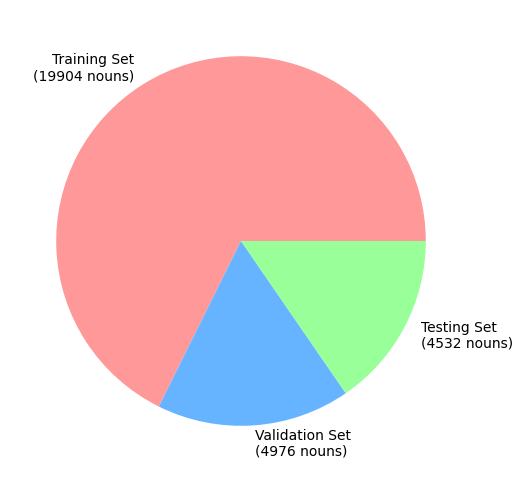

In [42]:
labels = [f'Training Set\n({train} nouns)', f'Validation Set\n({valid} nouns)', f'Testing Set\n({test.shape[0]} nouns)']
sizes = [train, valid, test.shape[0]]
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors)

plt.show()
